In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
address_data = 'C:/Users/Oscar Gomez/data_ventes.csv'
data = pd.read_csv(address_data)
data.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,yyyy,mm,dd,hh,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,4.99,0,2021,4,10,18,5
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,41,4.99,0,2021,12,27,11,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,37,4.99,0,2021,10,27,4,2
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,33,4.99,0,2021,7,4,6,6
4,0_1483,2021-11-13 02:04:21.760392,s_118789,c_868,m,1975,47,4.99,0,2021,11,13,2,5


In [3]:
#tableau avec les totaux par client
trans_total_client1 = pd.pivot_table(data, index=['client_id','age','sex'], values=['price','session_id', 'id_prod'], 
                                     aggfunc={'price': 'sum', 'session_id': lambda x: len(x.unique()), 'id_prod': 'count' })
trans_total_client1 = trans_total_client1.rename_axis(None, axis=1)
trans_total_client1.reset_index(inplace=True)
trans_total_client1 = trans_total_client1.rename(columns={'price':'trans_total', 'session_id':'sess_total', 'id_prod': 'total_items'})
trans_total_client1.head(10)

,client_id,age,sex,total_items,trans_total,sess_total
0,c_1,67,m,20,300.65,15
1,c_10,66,m,28,586.18,16
2,c_100,30,m,6,222.87,3
3,c_1000,56,f,56,980.02,42
4,c_1001,40,m,58,1102.45,24
5,c_1002,40,f,24,298.65,11
6,c_1003,40,m,49,552.67,21
7,c_1004,49,m,37,520.23,18
8,c_1005,81,f,32,476.67,15
9,c_1006,43,m,143,1925.49,63


In [4]:
trans_total_client1.describe()

,age,total_items,trans_total,sess_total
count,8596.000000,8596.000000,8596.000000,8596.000000
mean,43.739646,36.476501,623.856789,18.356096
std,16.910542,33.525048,457.027384,15.189603
min,18.000000,1.000000,4.150000,1.000000
25%,30.000000,14.000000,275.632500,7.000000
50%,43.000000,25.000000,501.170000,13.000000
75%,56.000000,47.000000,869.785000,25.000000
max,93.000000,195.000000,2564.250000,84.000000


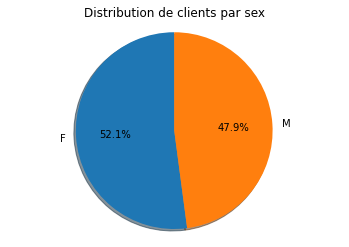

In [5]:
fig1, ax1 = plt.subplots()
ax1.pie(trans_total_client1.groupby(['sex']).count()['client_id'], labels=['F','M'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution de clients par sex')
plt.savefig('Distri2.png')
plt.show()

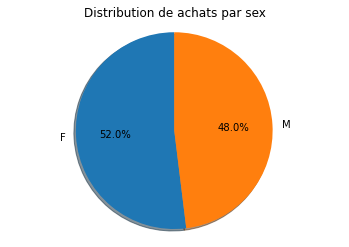

In [6]:
fig2, ax2 = plt.subplots()
ax2.pie(trans_total_client1.groupby(['sex']).sum()['trans_total'], labels=['F','M'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
plt.title('Distribution de achats par sex')
plt.savefig('Distri1.png')
plt.show()

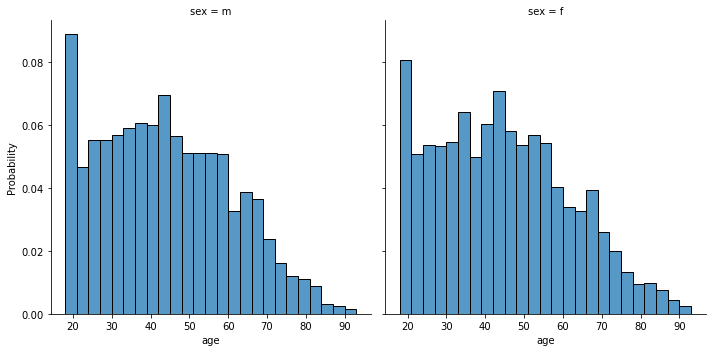

In [7]:
#largeur de classe : 3 ans
sns.displot(trans_total_client1, x="age", col='sex', multiple="dodge", bins=25, stat='probability', common_norm=False)
plt.savefig('Distri_age_1.png');

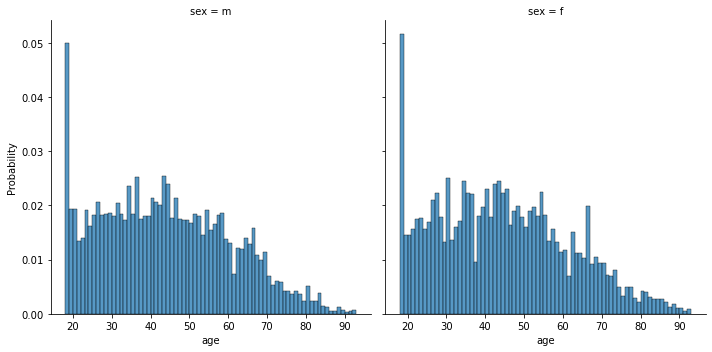

In [8]:
#largeur de classe : 1 an
sns.displot(trans_total_client1, x="age", col='sex', multiple="dodge", bins=75, stat='probability', common_norm=False)
plt.savefig('Distri_age_2.png');

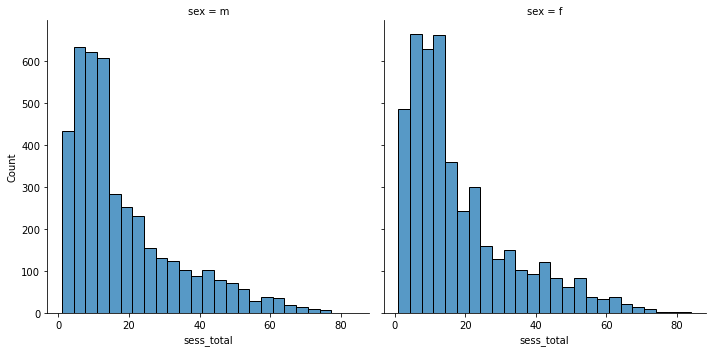

In [9]:
sns.displot(trans_total_client1, x="sess_total", col='sex', multiple="dodge", bins=25)
plt.savefig('Distri_sess.png');

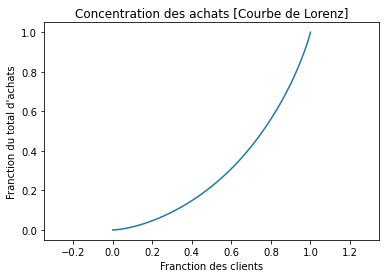

In [67]:
d_client = trans_total_client1['trans_total'].values
n = len(d_client)
lorenz = np.cumsum(np.sort(d_client)) / d_client.sum()
lorenz = np.append([0],lorenz) 

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title('Concentration des achats [Courbe de Lorenz]')
plt.xlabel('Franction des clients')
plt.ylabel('Franction du total d\'achats')
plt.savefig('lorenz.png')
plt.show()

In [63]:
lorenz.sum().round(2)

2600.56

In [72]:
AUC = (lorenz.sum())/n 
S = 0.5 - AUC 
gini = 2*S
print('Le coefficient de Gini pour les achats des clients est {}'.format(gini.round(4)))

Le coefficient de Gini pour les achats des clients est 0.3949


In [12]:
#transaction totale et nombre d'items par session
trans_total_sess = pd.pivot_table(data, index=['session_id','client_id','age','sex','yyyy','mm','dd','day'], 
                                 values=['price', 'id_prod'], 
                                 aggfunc={'price': 'sum', 'id_prod':'count'})
trans_total_sess = trans_total_sess.rename(columns={'price':'trans_total', 'id_prod':'items'})
trans_total_sess = trans_total_sess.rename_axis(None, axis=1)
trans_total_sess.reset_index(inplace=True)
trans_total_sess.head(10)

,session_id,client_id,age,sex,yyyy,mm,dd,day,items,trans_total
0,s_1,c_329,55,f,2021,3,1,0,1,11.99
1,s_10,c_2218,52,f,2021,3,1,0,1,26.99
2,s_100,c_3854,44,f,2021,3,1,0,2,33.72
3,s_1000,c_1014,33,m,2021,3,3,2,4,39.22
4,s_10000,c_476,33,f,2021,3,22,0,3,41.49
5,s_100000,c_6924,37,f,2021,10,4,0,1,10.00
6,s_100003,c_8020,49,m,2021,10,4,0,3,51.18
7,s_100004,c_3034,41,f,2021,10,4,0,1,9.92
8,s_100005,c_1966,73,f,2021,10,4,0,1,4.99
9,s_100007,c_7695,44,m,2021,10,4,0,1,8.99


In [13]:
trans_total_sess[['trans_total', 'items']].describe()

,trans_total,items
count,159273.000000,159273.000000
mean,33.669693,1.968645
std,31.280622,1.261487
min,0.620000,1.000000
25%,14.990000,1.000000
50%,24.990000,2.000000
75%,42.360000,3.000000
max,539.230000,14.000000


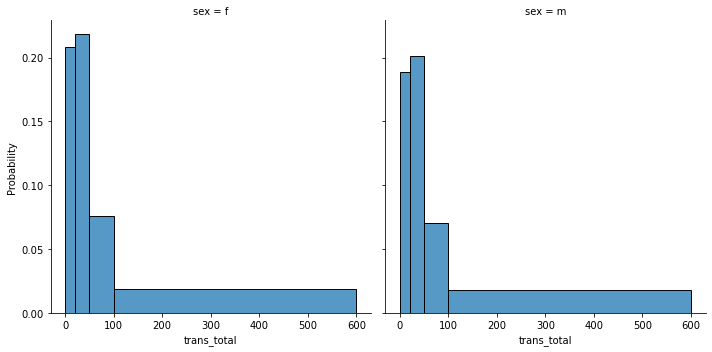

In [14]:
#consommation faible [0,30)
#consommation relativement faible [30,50)
#consommation relativement élevée [50,100)
#consommation élevée >=100
sns.displot(trans_total_sess, x="trans_total", col='sex', multiple="dodge", bins=[0,20,50,100,600], stat='probability')
plt.savefig('dist_mont.png');

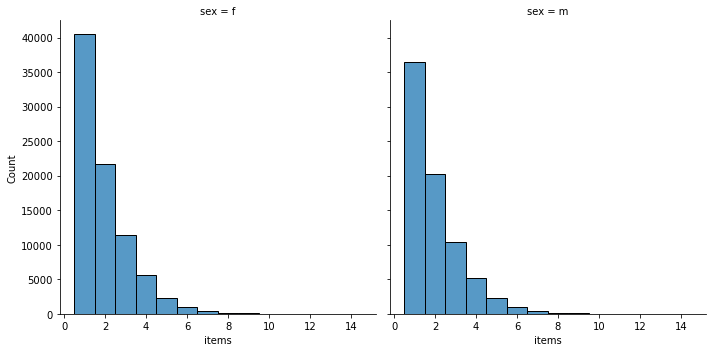

In [15]:
sns.displot(trans_total_sess, x="items", col='sex', multiple="dodge", discrete=True)
plt.savefig('dist_items.png');

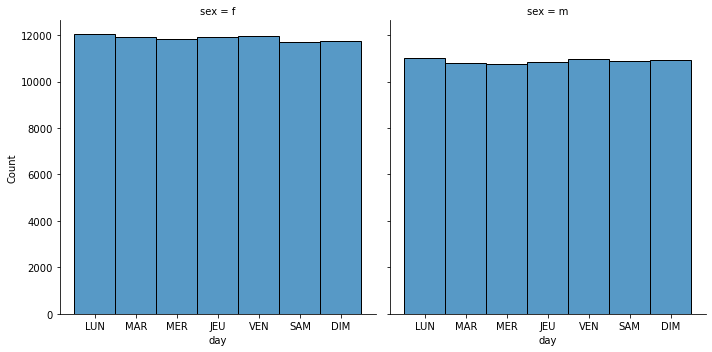

In [16]:
sns.displot(trans_total_sess, x='day', col='sex', multiple="dodge", discrete=True)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["LUN", "MAR", "MER", 'JEU', 'VEN', 'SAM', 'DIM'])
plt.savefig('dist_day.png');

In [17]:
#transactions, nombre d'articles et nombre de clients, total par jour
dayly_trans = pd.pivot_table(trans_total_sess, index=['yyyy','mm','dd','day'], 
                                 values=['trans_total', 'items', 'client_id'], 
                                 aggfunc={'trans_total': 'sum', 'items':'sum', 'client_id':'count'})
dayly_trans = dayly_trans.rename(columns={'client_id':'clients'})
dayly_trans = dayly_trans.rename_axis(None, axis=1)
dayly_trans.reset_index(inplace=True)
dayly_trans.head(10)

,yyyy,mm,dd,day,clients,items,trans_total
0,2021,3,1,0,457,903,15319.67
1,2021,3,2,1,447,868,14409.49
2,2021,3,3,2,404,839,13602.03
3,2021,3,4,3,415,830,13418.64
4,2021,3,5,4,460,868,15918.13
5,2021,3,6,5,436,887,14500.26
6,2021,3,7,6,417,852,13883.95
7,2021,3,8,0,433,867,14486.72
8,2021,3,9,1,431,880,14391.34
9,2021,3,10,2,430,885,14581.38


In [18]:
#créer une série temporelle avec un index comme date
dayly_trans_series = dayly_trans.drop(columns=["yyyy", "mm", "dd", 'day'])
dayly_trans_series.index = pd.to_datetime(dayly_trans["yyyy"]*10000 + dayly_trans["mm"]*100 + dayly_trans["dd"], format="%Y%m%d")
dayly_trans_series.head()

,clients,items,trans_total
2021-03-01,457,903,15319.67
2021-03-02,447,868,14409.49
2021-03-03,404,839,13602.03
2021-03-04,415,830,13418.64
2021-03-05,460,868,15918.13


In [19]:
dayly_trans_series.describe()

,clients,items,trans_total
count,365.000000,365.000000,365.000000
mean,436.364384,859.046575,14692.254685
std,39.276441,115.696840,2070.781342
min,309.000000,543.000000,7396.450000
25%,419.000000,803.000000,14090.850000
50%,438.000000,861.000000,14874.760000
75%,462.000000,919.000000,15859.820000
max,512.000000,1230.000000,18880.340000


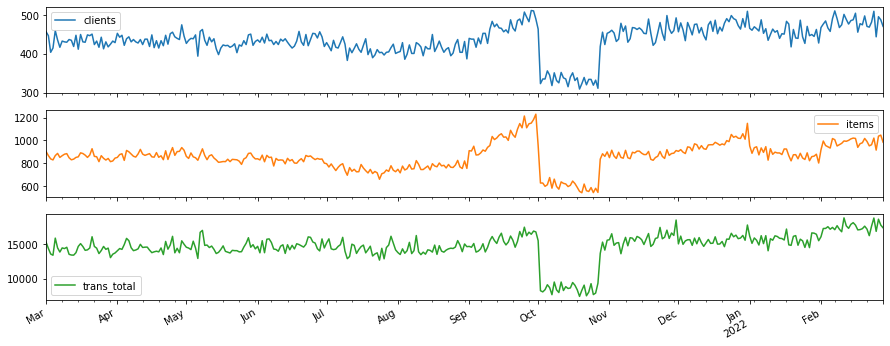

In [20]:
dayly_trans_series.plot(subplots=True, figsize=(15,6))
plt.savefig('daily_series.png');

In [21]:
trans_mm = pd.pivot_table(data, index=['mm'], columns=['categ'], values=['price'], 
                                     aggfunc={'price': 'sum'})
trans_mm = trans_mm.rename(columns={'price':'trans_total_cat'})
trans_mm.index = ['JAN','FEV','MAR','AVR','MAI','JUN','JUL','AOU','SEP','OCT','NOV','DEC']
trans_mm

trans_total_cat                      
categ               0          1          2
JAN         153501.60  239849.07   93224.71
FEV         171153.37  199168.20  119774.94
MAR         180578.15  174569.68   87791.28
AVR         191395.39  145272.82   99541.06
MAI         182278.75  155309.63  113723.56
JUN         156576.88  177840.33  110450.26
JUL         135417.40  176647.61  133591.40
AOU         156822.46  152886.83  133462.39
SEP         229084.41  177809.68   59856.27
OCT         184775.95   31892.01   78570.59
NOV         144623.31  235970.11   94519.06
DEC         191397.34  234369.37   58977.09

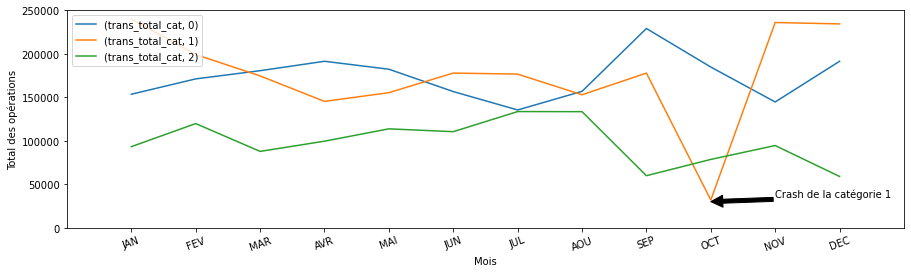

In [22]:
trans_mm.plot(figsize=(15,4))
plt.axis([-1, 12, 0, 250000])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
           ['JAN','FEV','MAR','AVR','MAI','JUN','JUL','AOU','SEP','OCT','NOV','DEC'], 
           rotation=20)
plt.xlabel('Mois')
plt.ylabel('Total des opérations')
plt.legend(loc='upper left')
plt.annotate('Crash de la catégorie 1', xy=(9, 30000), xytext=(10, 35000),
             arrowprops=dict(facecolor='black'))
plt.savefig('series_cat.png');

In [23]:
#tableau de contingence
X = "sex"
Y = "categ"
cont_s_cat = data[[X,Y]].pivot_table(index=X,columns=Y, aggfunc=len, margins=True, margins_name="Total")
cont_s_cat.head()

categ,0,1,2,Total
sex,,,,
f,101148,53774,8122,163044
m,94023,48851,7634,150508
Total,195171,102625,15756,313552


In [24]:
tx = cont_s_cat.loc[:,["Total"]]
ty = cont_s_cat.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n
indep

categ,0,1,2,Total
sex,,,,
f,101487.027747,53364.005014,8192.96724,163044.0
m,93683.972253,49260.994986,7563.03276,150508.0
Total,195171.000000,102625.000000,15756.00000,313552.0


In [25]:
measure = (cont_s_cat-indep)**2/indep
measure = measure.drop(columns = ['Total'])
measure = measure.drop(['Total'])
xi_n = measure.sum().sum()
xi_n

10.202417277273174

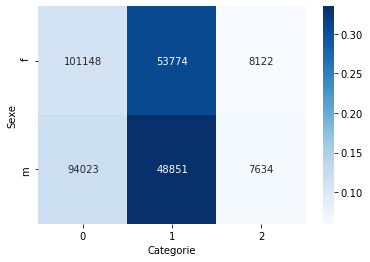

In [26]:
sns.heatmap(measure/xi_n, cmap='Blues', annot=cont_s_cat.iloc[:-1,:-1], fmt='d')
plt.xlabel('Categorie')
plt.ylabel('Sexe')
plt.savefig('heatmap.png');

In [27]:
generation = []
for y in data.birth:
    if y<1946:
        generation.append('sil_gen')
    elif 1946<=y<1965:
        generation.append('b_boom')
    elif 1965<=y<1981:
        generation.append('gen_x')
    elif 1981<=y<1997:
        generation.append('mill')
    else:
        generation.append('gen_z')

data['gen'] = generation
data.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ,yyyy,mm,dd,hh,day,gen
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,45,4.99,0,2021,4,10,18,5,gen_x
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,41,4.99,0,2021,12,27,11,0,mill
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,37,4.99,0,2021,10,27,4,2,mill
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,33,4.99,0,2021,7,4,6,6,mill
4,0_1483,2021-11-13 02:04:21.760392,s_118789,c_868,m,1975,47,4.99,0,2021,11,13,2,5,gen_x


In [28]:
#tableau de contingence
W = "gen"
Z = "categ"
cont_gen_cat = data[[W,Z]].pivot_table(index=Z,columns=W, aggfunc=len, margins=True, margins_name="Total")
cont_gen_cat

gen,b_boom,gen_x,gen_z,mill,sil_gen,Total
categ,,,,,,
0,19437,81653,5375,85239,3467,195171
1,23940,36391,8581,29378,4335,102625
2,365,504,9102,5717,68,15756
Total,43742,118548,23058,120334,7870,313552


In [29]:
tx2 = cont_gen_cat.loc[:,["Total"]]
ty2 = cont_gen_cat.loc[["Total"],:]
n = len(data)
indep2 = tx2.dot(ty2) / n
indep2

gen,b_boom,gen_x,gen_z,mill,sil_gen,Total
categ,,,,,,
0,27227.285688,73790.413418,14352.493105,74902.112294,4898.695495,195171.0
1,14316.677138,38800.545045,7546.841513,39385.099601,2575.836703,102625.0
2,2198.037174,5957.041537,1158.665382,6046.788105,395.467801,15756.0
Total,43742.000000,118548.000000,23058.000000,120334.000000,7870.000000,313552.0


In [30]:
measure_gen = (cont_gen_cat-indep2)**2/indep2
measure_gen = measure_gen.drop(columns = ['Total'])
measure_gen = measure_gen.drop(['Total'])
xi_n_gen = measure_gen.sum().sum()
xi_n_gen

82296.83179443232

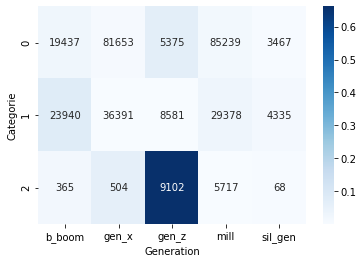

In [31]:
sns.heatmap(measure_gen/xi_n_gen, cmap='Blues', annot=cont_gen_cat.iloc[:-1,:-1], fmt='d')
plt.ylabel('Categorie')
plt.xlabel('Generation')
plt.savefig('heatmap_gen.png');

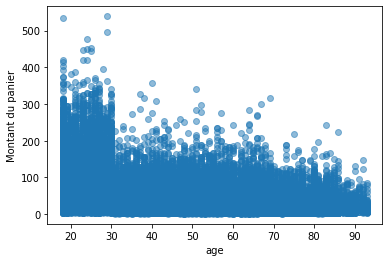

In [32]:
plt.plot(trans_total_sess["age"],trans_total_sess["trans_total"], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("Montant du panier")
plt.savefig('mont_age_all.png')
plt.show()

In [33]:
avg_trans_age = pd.pivot_table(trans_total_sess, index=['age'],
                         values=['trans_total'], 
                         aggfunc={'trans_total':'mean'})
avg_trans_age = avg_trans_age.rename(columns={'trans_total':'avg_trans'})
avg_trans_age = avg_trans_age.rename_axis(None, axis=1)
avg_trans_age.reset_index(inplace=True)
avg_trans_age.head(10)

,age,avg_trans
0,18,69.815169
1,19,69.164496
2,20,69.697690
3,21,71.629941
4,22,67.254341
5,23,70.500453
6,24,71.151096
7,25,70.082701
8,26,72.320455
9,27,69.323027


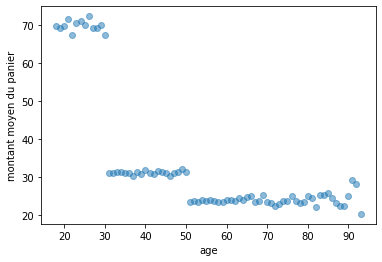

In [34]:
plt.plot(avg_trans_age["age"],avg_trans_age["avg_trans"], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("montant moyen du panier")
plt.savefig('mont_age_avg.png')
plt.show()

In [35]:
X1 = avg_trans_age[["age"]]
y1 = avg_trans_age["avg_trans"]
reg1 = linear_model.LinearRegression().fit(X1, y1)
print('intercept = {}'.format(reg1.intercept_))
print('coef. = {}'.format(reg1.coef_))
print('R^2 = {}'.format(reg1.score(X1, y1)))

intercept = 65.25726435492358
coef. = [-0.56783893]
R^2 = 0.5552877275338806


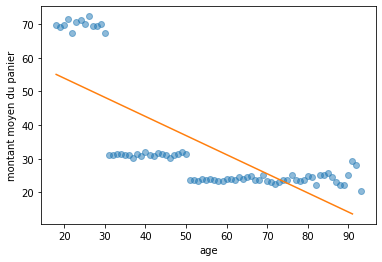

In [36]:
plt.plot(avg_trans_age["age"],avg_trans_age["avg_trans"], 'o', alpha=0.5)
plt.plot(range(18, 92),[reg1.coef_*x+reg1.intercept_ for x in range(18, 92)])
plt.xlabel("age")
plt.ylabel("montant moyen du panier")
plt.savefig('mont_age_reg.png')
plt.show()

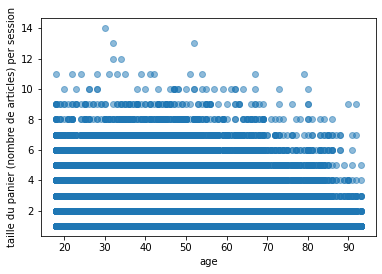

In [37]:
plt.plot(trans_total_sess["age"],trans_total_sess["items"], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("taille du panier (nombre de articles) per session")
plt.savefig('tail_age.png')
plt.show()

In [38]:
avg_art = pd.pivot_table(trans_total_sess, index=['age'],
                         values=['items'], 
                         aggfunc={'items':'mean'})
avg_art = avg_art.rename(columns={'items':'avg_items'})
avg_art = avg_art.rename_axis(None, axis=1)
avg_art.reset_index(inplace=True)
avg_art.head(10)

,age,avg_items
0,18,1.736705
1,19,1.706020
2,20,1.723256
3,21,1.714768
4,22,1.825357
5,23,1.780131
6,24,1.722222
7,25,1.837450
8,26,1.696254
9,27,1.775862


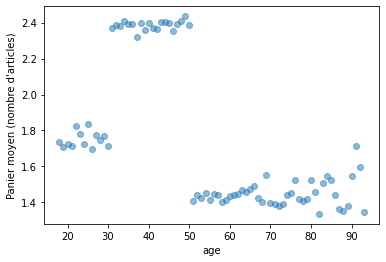

In [39]:
plt.plot(avg_art["age"],avg_art["avg_items"], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("Panier moyen (nombre d'articles)")
plt.savefig('tail_avg_age.png')
plt.show()

In [40]:
X2 = avg_art[["age"]]
y2 = avg_art["avg_items"]
reg2 = linear_model.LinearRegression().fit(X2, y2)
print('intercept = {}'.format(reg2.intercept_))
print('coef. = {}'.format(reg2.coef_))
print('R^2 = {}'.format(reg2.score(X2, y2)))

intercept = 2.346400480162643
coef. = [-0.01080937]
R^2 = 0.34873340345840664


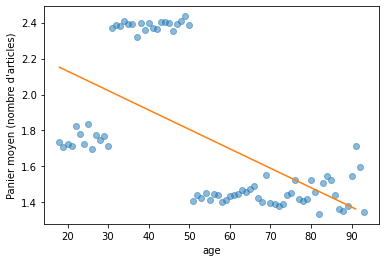

In [41]:
plt.plot(avg_art["age"],avg_art["avg_items"], 'o', alpha=0.5)
plt.plot(range(18, 92),[reg2.coef_*x+reg2.intercept_ for x in range(18, 92)])
plt.xlabel("age")
plt.ylabel("Panier moyen (nombre d'articles)")
plt.savefig('tail_age_reg.png')
plt.show()

In [42]:
sess_mm = pd.pivot_table(data, index=['client_id','age'], columns=['mm'],
                         values=['session_id'], 
                         aggfunc={'session_id': lambda x: len(x.unique())},
                         margins=True, margins_name="sess_total")
sess_mm.reset_index(inplace=True)
sess_mm = sess_mm.rename(columns={'session_id':'sess_count'})
sess_mm.drop(sess_mm.tail(1).index, inplace=True)
sess_mm.fillna(0, inplace=True)
sess_mm.head(10)

client_id age sess_count                                                    \
mm                        1    2    3    4    5    6    7    8    9   10   11   
0        c_1  67        0.0  1.0  0.0  0.0  0.0  1.0  4.0  1.0  2.0  1.0  2.0   
1       c_10  66        0.0  0.0  1.0  2.0  0.0  1.0  2.0  2.0  4.0  0.0  2.0   
2      c_100  30        0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
3     c_1000  56        3.0  6.0  5.0  1.0  3.0  3.0  2.0  3.0  5.0  2.0  5.0   
4     c_1001  40        0.0  4.0  1.0  2.0  0.0  1.0  0.0  2.0  6.0  3.0  2.0   
5     c_1002  40        0.0  2.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  2.0  2.0   
6     c_1003  40        2.0  2.0  4.0  1.0  1.0  4.0  1.0  0.0  1.0  4.0  1.0   
7     c_1004  49        1.0  2.0  2.0  2.0  1.0  1.0  1.0  3.0  1.0  3.0  1.0   
8     c_1005  81        2.0  1.0  1.0  1.0  2.0  0.0  0.0  0.0  1.0  1.0  2.0   
9     c_1006  43        6.0  7.0  4.0  8.0  3.0  2.0  8.0  6.0  4.0  7.0  4.0   

                    
mm   12 sess_total  
0   3.0         15  
1   2.0         16  
2   0.0          3  
3   4.0         42  
4   3.0         24  
5   0.0         11  
6   0.0         21  
7   0.0         18  
8   4.0         15  
9   4.0         63

In [43]:
sess_mm['avg_mm'] = sess_mm['sess_count']['sess_total']/12
sess_mm.head()

client_id age sess_count                                                    \
mm                        1    2    3    4    5    6    7    8    9   10   11   
0        c_1  67        0.0  1.0  0.0  0.0  0.0  1.0  4.0  1.0  2.0  1.0  2.0   
1       c_10  66        0.0  0.0  1.0  2.0  0.0  1.0  2.0  2.0  4.0  0.0  2.0   
2      c_100  30        0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
3     c_1000  56        3.0  6.0  5.0  1.0  3.0  3.0  2.0  3.0  5.0  2.0  5.0   
4     c_1001  40        0.0  4.0  1.0  2.0  0.0  1.0  0.0  2.0  6.0  3.0  2.0   

                      avg_mm  
mm   12 sess_total            
0   3.0         15  1.250000  
1   2.0         16  1.333333  
2   0.0          3  0.250000  
3   4.0         42  3.500000  
4   3.0         24  2.000000

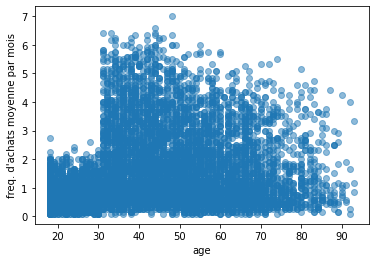

In [44]:
plt.plot(sess_mm['age'],sess_mm['avg_mm'], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("freq. d'achats moyenne par mois")
plt.savefig('freq_age.png')
plt.show()

In [45]:
sess_mm_age = pd.pivot_table(data, index=['age'],
                         values=['session_id', 'client_id'], 
                         aggfunc={'session_id': lambda x: len(x.unique()), 'client_id': lambda y: len(y.unique())}
                         )
sess_mm_age.reset_index(inplace=True)
sess_mm_age = sess_mm_age.rename(columns={'session_id':'sess_count', 'client_id':'client_count'})
sess_mm_age.head(10)

,age,client_count,sess_count
0,18,437,4182
1,19,145,1265
2,20,145,1276
3,21,125,1173
4,22,136,1180
5,23,158,1360
6,24,137,1355
7,25,151,1241
8,26,179,1717
9,27,175,1554


In [46]:
sess_mm_age['sess_client_mm'] = (sess_mm_age['sess_count']/12)/sess_mm_age['client_count']
sess_mm_age.head(10)

,age,client_count,sess_count,sess_client_mm
0,18,437,4182,0.797483
1,19,145,1265,0.727011
2,20,145,1276,0.733333
3,21,125,1173,0.782000
4,22,136,1180,0.723039
5,23,158,1360,0.717300
6,24,137,1355,0.824209
7,25,151,1241,0.684879
8,26,179,1717,0.799348
9,27,175,1554,0.740000


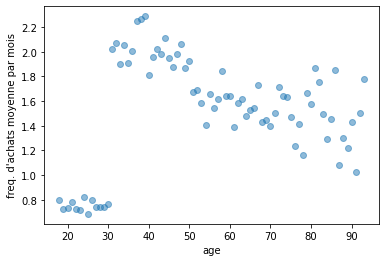

In [47]:
plt.plot(sess_mm_age['age'],sess_mm_age['sess_client_mm'], 'o', alpha=0.5)
plt.xlabel("age")
plt.ylabel("freq. d'achats moyenne par mois")
plt.savefig('freq_avg_age.png')
plt.show()

In [48]:
X3 = sess_mm_age[["age"]]
y3 = sess_mm_age['sess_client_mm']
reg3 = linear_model.LinearRegression().fit(X3, y3)
print('intercept = {}'.format(reg3.intercept_))
print('coef. = {}'.format(reg3.coef_))
print('R^2 = {}'.format(reg3.score(X3, y3)))

intercept = 1.324997599492638
coef. = [0.00353001]
R^2 = 0.03125060570014104


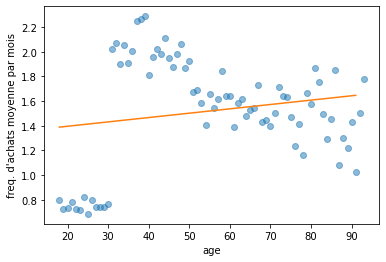

In [49]:
plt.plot(sess_mm_age['age'],sess_mm_age['sess_client_mm'], 'o', alpha=0.5)
plt.plot(range(18, 92),[reg3.coef_*x+reg3.intercept_ for x in range(18, 92)])
plt.xlabel("age")
plt.ylabel("freq. d'achats moyenne par mois")
plt.savefig('freq_age_reg.png')
plt.show()

In [50]:
sess_mm_age30 = sess_mm_age[sess_mm_age['age']>30]
X4 = sess_mm_age30[["age"]]
y4 = sess_mm_age30['sess_client_mm']
reg4 = linear_model.LinearRegression().fit(X4, y4)
print('intercept = {}'.format(reg4.intercept_))
print('coef. = {}'.format(reg4.coef_))
print('R^2 = {}'.format(reg4.score(X4, y4)))

intercept = 2.425457649516432
coef. = [-0.01203044]
R^2 = 0.5694630261854043


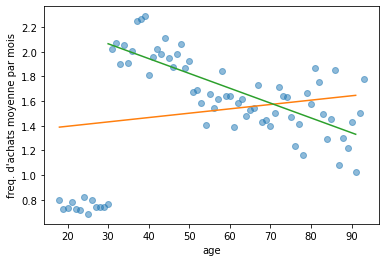

In [51]:
plt.plot(sess_mm_age['age'],sess_mm_age['sess_client_mm'], 'o', alpha=0.5)
plt.plot(range(18, 92),[reg3.coef_*x+reg3.intercept_ for x in range(18, 92)])
plt.plot(range(30, 92),[reg4.coef_*x+reg4.intercept_ for x in range(30, 92)])
plt.xlabel("age")
plt.ylabel("freq. d'achats moyenne par mois")
plt.savefig('freq_age_reg30.png')
plt.show()

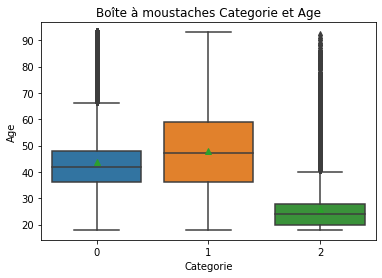

In [52]:
box_cat_age = sns.boxplot(x='categ', y='age', data=data, showmeans=True)
plt.xlabel('Categorie')
plt.ylabel('Age')
plt.title('Boîte à moustaches Categorie et Age')
plt.savefig('boxplot_cat_age');

In [53]:
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(data[X],data[Y])

0.11281696159855092